In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option("display.max_columns",100)     #displaying  all columns
df_train = pd.read_excel('Data_Train.xlsx')  #reading the Training dataset(1st) from excel file
df_train.head() #displaying first 5 rows

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
df_train.shape

(10683, 11)

In [4]:
df_train.info()   #info about the features in dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


# Data Preprocessing

In [5]:
#checking for null values
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [6]:
df_train[df_train['Route'].isnull()]   #displaying the row having null values

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [7]:
df_train.dropna(axis = 0, inplace = True)   #dropping null valuess

In [8]:
df_train.isnull().sum()    #no null values left

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [9]:
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [10]:
#converting departure time to numeric form.
df_train['Dep_hour'] = pd.to_datetime(df_train['Dep_Time']).dt.hour
df_train['Dep_min'] = pd.to_datetime(df_train['Dep_Time']).dt.minute

In [11]:
#dropping the original column
df_train.drop('Dep_Time', axis = 1, inplace=True)

In [12]:
#converting arrival time to numeric form.
df_train['Arrival_hour'] = pd.to_datetime(df_train['Arrival_Time']).dt.hour
df_train['Arrival_min'] = pd.to_datetime(df_train['Arrival_Time']).dt.minute

In [13]:
#dropping the original column after converting
df_train.drop('Arrival_Time', axis=1, inplace = True)

In [14]:
# Time taken by plane to reach destination is called Duration
# It is the differnce betwwen Departure Time and Arrival time


# Assigning and converting Duration column into list

duration = list(df_train["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [15]:
df_train['duration_hours'] = duration_hours
df_train['duration_mins'] = duration_mins

In [16]:
#dropping the original column
df_train.drop('Duration', axis = 1, inplace = True)

In [17]:
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Total_Stops,Additional_Info,Price,Dep_hour,Dep_min,Arrival_hour,Arrival_min,duration_hours,duration_mins
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,22,20,1,10,2,50
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,50,13,15,7,25
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,25,4,25,19,0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,18,5,23,30,5,25
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,16,50,21,35,4,45


# Handling Categorical Data

In [18]:
df_train['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

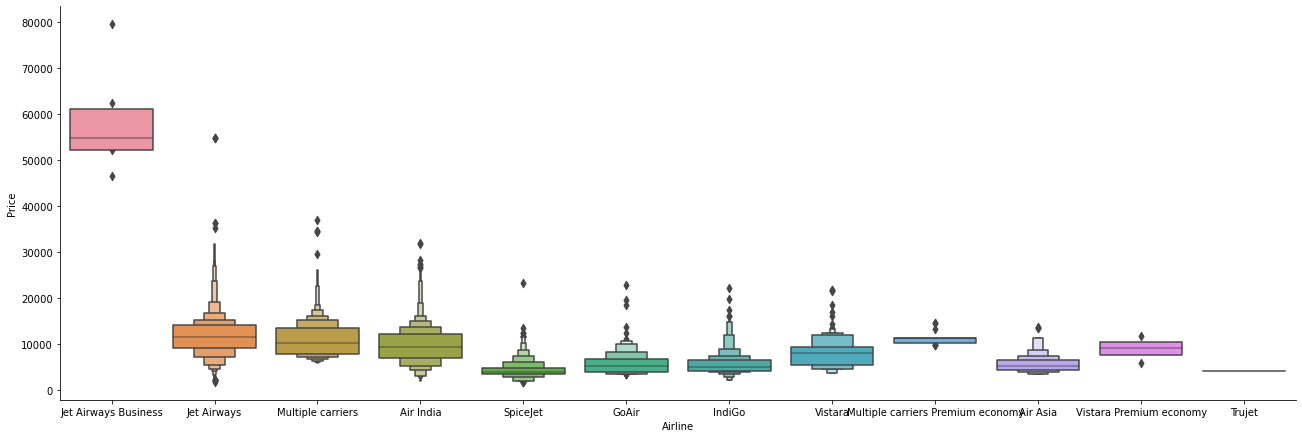

In [19]:
sns.catplot(x = 'Airline', y = 'Price', data = df_train.sort_values('Price', ascending = False), kind = 'boxen',
            height = 6, aspect = 3)
plt.show()

In [20]:
# Airline is a nominal categorical data, so OneHotEncoding is applied on it

airlines = df_train['Airline']
airlines = pd.get_dummies(airlines, drop_first = True)
airlines.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [21]:
df_train['Source'].value_counts()  #source column

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

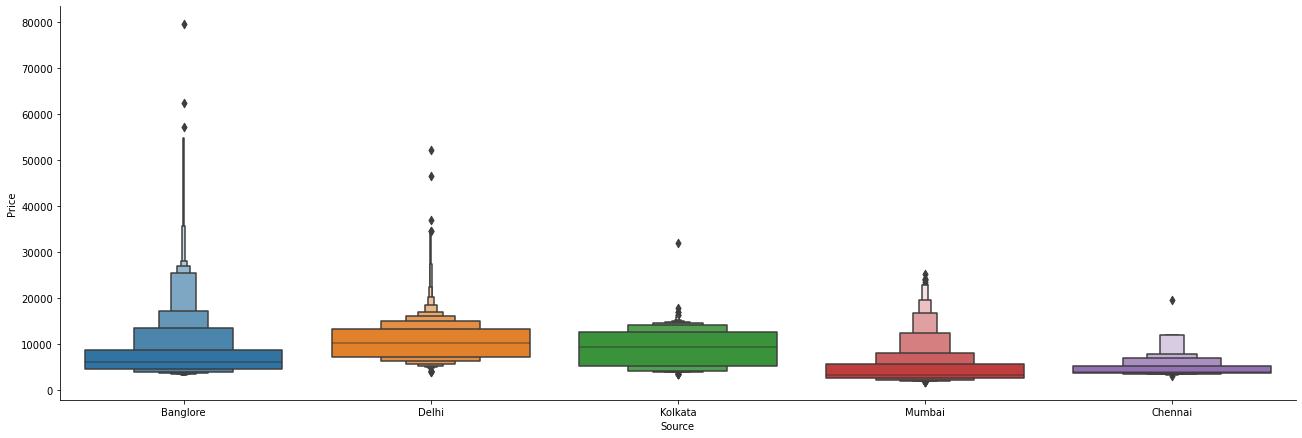

In [22]:
#from graph we get Banglore of all sources has the highest price, rest have almost similar median

sns.catplot(x = 'Source', y = 'Price', data = df_train.sort_values('Price', ascending = False),kind = 'boxen', height = 6, aspect = 3)

In [23]:
# As Source is a nominal categorical feature, OneHotEndcoding is performed

source = pd.get_dummies(df_train['Source'], drop_first = True)

In [24]:
source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


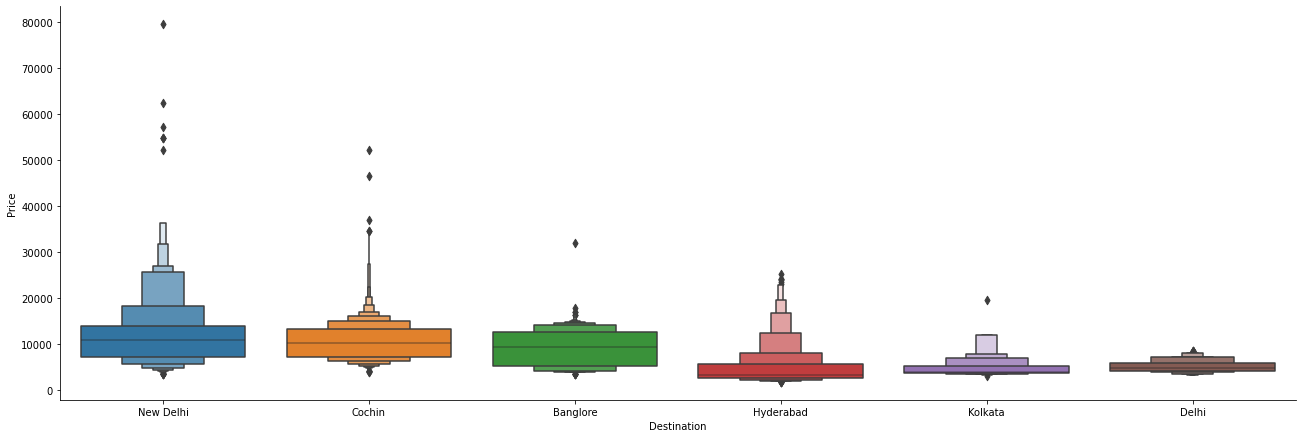

In [25]:
#New delhi of all 'destinations' has the highest price.

sns.catplot(x = 'Destination', y = 'Price', data = df_train.sort_values('Price', ascending = False),kind = 'boxen',
            height = 6, aspect = 3)

In [26]:
# Destination is a nominal categorical data, so OneHotEncoding is applied on it

destination = pd.get_dummies(df_train['Destination'], drop_first = True)

In [27]:
destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [28]:
#concatinating all the dummies created for columns into original dataframe

df_train = pd.concat([df_train, airlines, source, destination], axis =1)
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Total_Stops,Additional_Info,Price,Dep_hour,Dep_min,Arrival_hour,Arrival_min,duration_hours,duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [29]:
#dropping all original columns after converting them into dummies including unnecessary columns.

df_train.drop(['Airline','Source','Destination','Additional_Info', 'Route', 'Trujet'], axis = 1, inplace = True)

In [30]:
df_train.head()

,Date_of_Journey,Total_Stops,Price,Dep_hour,Dep_min,Arrival_hour,Arrival_min,duration_hours,duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,24/03/2019,non-stop,3897,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1/05/2019,2 stops,7662,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,9/06/2019,2 stops,13882,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,12/05/2019,1 stop,6218,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,01/03/2019,1 stop,13302,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [31]:
df_train['Total_Stops'].value_counts()   #total stops column

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [32]:
# Total_Stops is an ordinal categorical feature, so Labelling is done.

df_train['Total_Stops'] = df_train['Total_Stops'].replace({'non-stop': 0, '1 stop': 1, '2 stops':2, '3 stops':3, "4 stops": 4})

In [33]:
# dropping Date_of_Journey column as its not mandatory, because all flights data is from same year

df_train.drop(['Date_of_Journey'], axis =1, inplace = True)

In [34]:
df_train.head()

,Total_Stops,Price,Dep_hour,Dep_min,Arrival_hour,Arrival_min,duration_hours,duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,3897,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [35]:
#finding correlation of all col.s with price variable(target)

corr = df_train.corr()['Price']
corr

Total_Stops                          0.603897
Price                                1.000000
Dep_hour                             0.006799
Dep_min                             -0.024458
Arrival_hour                         0.024244
Arrival_min                         -0.086155
duration_hours                       0.508778
duration_mins                       -0.124855
Air India                            0.050432
GoAir                               -0.095151
IndiGo                              -0.361070
Jet Airways                          0.416124
Jet Airways Business                 0.253303
Multiple carriers                    0.139793
Multiple carriers Premium economy    0.017650
SpiceJet                            -0.296565
Vistara                             -0.060654
Vistara Premium economy             -0.000454
Chennai                             -0.179223
Delhi                                0.270676
Kolkata                              0.009358
Mumbai                            

<AxesSubplot:>

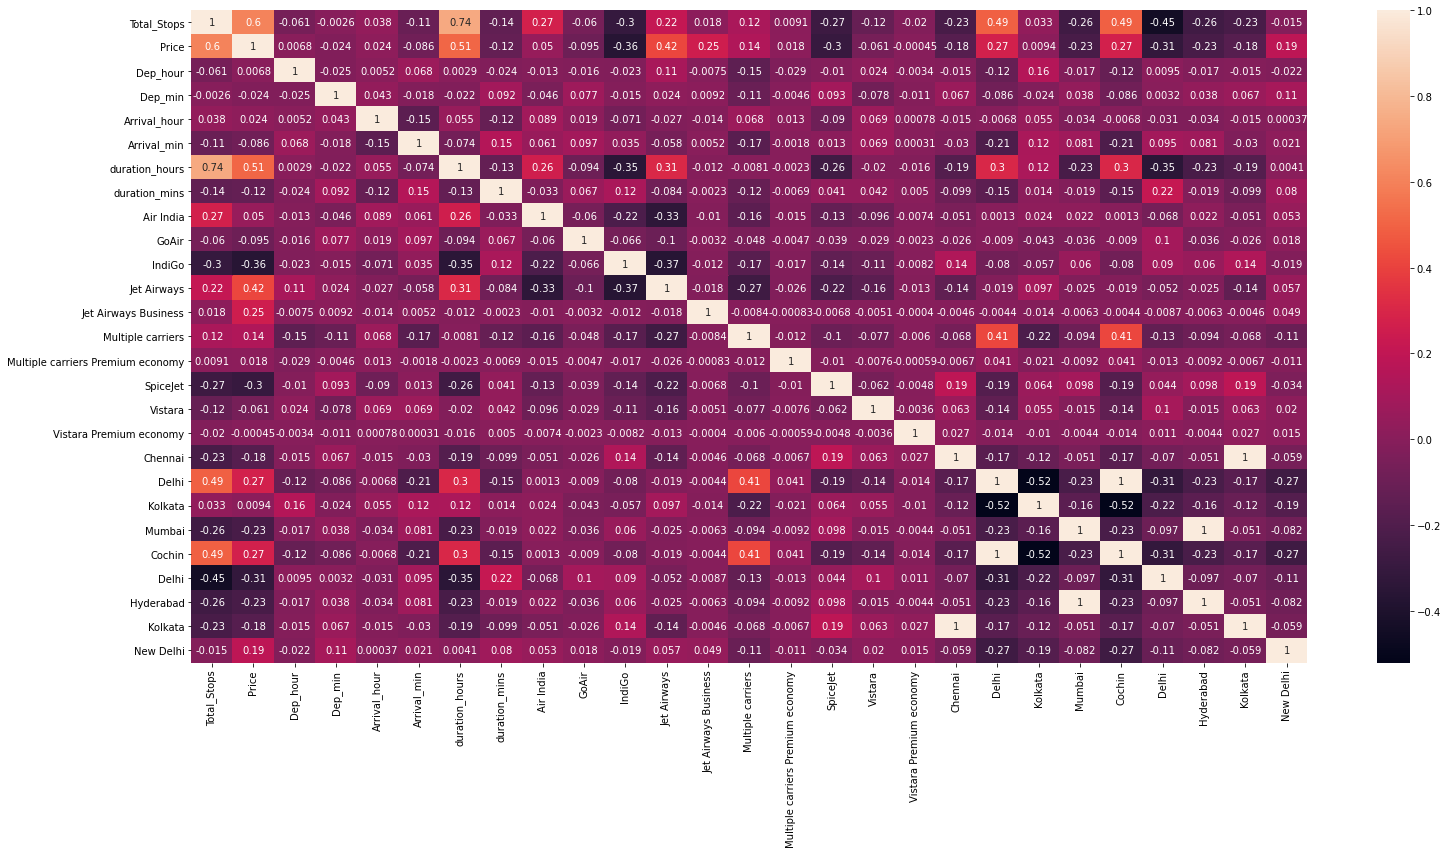

In [36]:
#finding inter-column correlation 

plt.figure(figsize = (25,12))
sns.heatmap(df_train.corr(), annot = True)

In [37]:
df_train.head()

,Total_Stops,Price,Dep_hour,Dep_min,Arrival_hour,Arrival_min,duration_hours,duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,3897,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [38]:
df_train.shape

(10682, 27)

In [39]:
df_train.columns

Index(['Total_Stops', 'Price', 'Dep_hour', 'Dep_min', 'Arrival_hour',
       'Arrival_min', 'duration_hours', 'duration_mins', 'Air India', 'GoAir',
       'IndiGo', 'Jet Airways', 'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Vistara',
       'Vistara Premium economy', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai',
       'Cochin', 'Delhi', 'Hyderabad', 'Kolkata', 'New Delhi'],
      dtype='object')

# Feature Selection

In [40]:
#dividing the dataset into data and target
X = df_train.drop('Price', axis =1)

In [41]:
y = df_train.loc[:,'Price']

In [42]:
print("X shape:",X.shape)
print("y shape:",y.shape)

X shape: (10682, 26)
y shape: (10682,)


In [43]:
X.head()

,Total_Stops,Dep_hour,Dep_min,Arrival_hour,Arrival_min,duration_hours,duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [44]:
#checking feature importance
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X,y)

ExtraTreesRegressor()

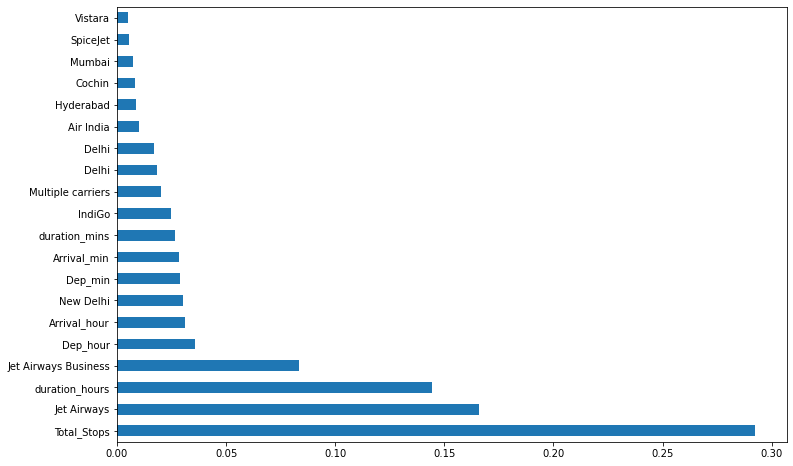

In [45]:
plt.figure(figsize = (12,8))
feat_importances =  pd.Series(selection.feature_importances_, index = X.columns)
feat_importances.nlargest(20).plot(kind = 'barh')
plt.show()

### 'Total_Stops' feature is of higher importance in the dataset, followed by 'duration_hours'

# Splitting training dataset into train and test sets

In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [89]:
#modelling the data

from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()
reg.fit(X_train, y_train)

RandomForestRegressor()

In [90]:
#predicting the data for X_test

y_test_pred = reg.predict(X_test)
y_test_pred

array([ 5452.37710356, 12135.89050123, 12625.84001231, ...,
       13488.68722866, 10633.85883715,  4664.09109858])

In [91]:
print('Training Score:',reg.score(X_train, y_train))

Training Score: 0.7819144880296782


In [92]:
print('Testing Score:',reg.score(X_test, y_test))

Testing Score: 0.6285282860621785


In [93]:
#comparing the actual and predicted price values

comp = pd.DataFrame({'Real Values': y_test, 'Predicted Values': y_test_pred})
comp.head(10)

,Real Values,Predicted Values
7930,4441,5452.377104
8033,14151,12135.890501
8617,14151,12625.840012
3836,13555,14297.642095
8636,6442,6629.661041
3035,14848,13887.321424
2785,5911,6077.909039
4228,9838,10805.102518
9740,8610,8633.915280
5814,13555,20069.780000


C:\Users\pankaj verma\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


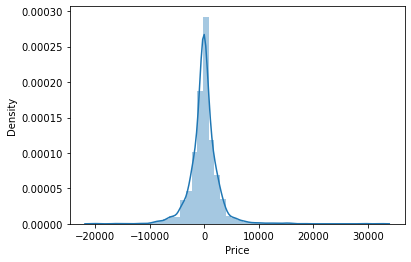

In [94]:
sns.distplot(y_test-y_test_pred)
plt.show()

Text(0, 0.5, 'y_test_pred')

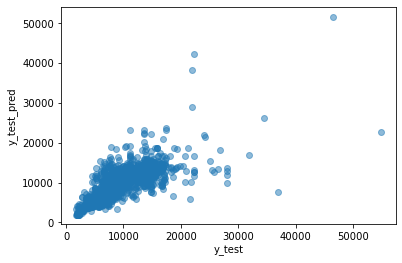

In [95]:
#checking the variance between the actual and predicted values

plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.xlabel('y_test')
plt.ylabel('y_test_pred')

# Evaluation

In [96]:
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))  #av. error in all price values
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_absolute_error(y_test, y_test_pred)))

MAE: 1670.8182230291636
MSE: 7619141.320344462
RMSE: 40.87564339590465


In [97]:
metrics.r2_score(y_test, y_test_pred)  #means our model is capable of explaining approx.63% of variance in model.

0.6285282860621785

# Test Dataset

In [98]:
#reading the 2nd dataset from excel file

df_test = pd.read_excel('Test_Set.xlsx')
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [99]:
#checking for null values,there are none

df_test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [100]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [101]:
df_test.shape

(2671, 10)

# Handling categorical data as done above.

In [102]:
df_test['Dep_hour'] = pd.to_datetime(df_test['Dep_Time']).dt.hour
df_test['Dep_min'] = pd.to_datetime(df_test['Dep_Time']).dt.minute

df_test['Arrival_hour'] = pd.to_datetime(df_test['Arrival_Time']).dt.hour
df_test['Arrival_min'] = pd.to_datetime(df_test['Arrival_Time']).dt.minute

In [103]:
# Assigning and converting Duration column into list
duration1 = list(df_test["Duration"])

for i in range(len(duration1)):
    if len(duration1[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration1[i]:
            duration1[i] = duration1[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration1[i] = "0h " + duration1[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration1)):
    duration_hours.append(int(duration1[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration1[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [104]:
df_test['Duration_hours'] = duration_hours
df_test['Duration_mins'] = duration_mins
df_test.drop(['Duration', 'Dep_Time', 'Arrival_Time'], axis =1, inplace = True)
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Total_Stops,Additional_Info,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,17,30,4,25,10,55
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No info,6,20,10,20,4,0
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included,19,15,19,0,23,45
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,8,0,21,0,13,0
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,non-stop,No info,23,55,2,45,2,50


In [105]:
Airline1 = pd.get_dummies(df_test['Airline'], drop_first = True)
source1 = pd.get_dummies(df_test['Source'], drop_first = True)
destination1 = pd.get_dummies(df_test['Destination'], drop_first = True)
df_test = pd.concat([df_test, Airline1, source1, destination1], axis=1)
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Total_Stops,Additional_Info,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No info,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included,19,15,19,0,23,45,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,8,0,21,0,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,non-stop,No info,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [106]:
df_test.drop(['Airline', 'Date_of_Journey','Source', 'Destination', 'Additional_Info', 'Route' ], axis = 1, inplace = True)

In [107]:
df_test['Total_Stops'].value_counts()

1 stop      1431
non-stop     849
2 stops      379
3 stops       11
4 stops        1
Name: Total_Stops, dtype: int64

In [108]:
df_test['Total_Stops'] = df_test['Total_Stops'].replace({'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4})
df_test.head()

,Total_Stops,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,1,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,19,15,19,0,23,45,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,8,0,21,0,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,0,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


## Predicting the Price values for the 2nd (Testing) Dataset by fitting above model to it.

In [109]:
df_test.head() #preprocessed testing dataset

,Total_Stops,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,1,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,19,15,19,0,23,45,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,8,0,21,0,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,0,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [110]:
df_test.shape

(2671, 26)

In [111]:
X2 = df_test

In [112]:
#predicting the price values for the given data

Predicted_Prices = reg.predict(X2)
Predicted_Prices

array([12275.52244396,  4226.        , 12656.5153628 , ...,
       13408.27303638, 11398.41736465,  7623.33319697])

In [113]:
#adding predicted values to the dataframe

df_test['Predicted Prices'] = Predicted_Prices

In [114]:
df_test.head(10)

,Total_Stops,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Predicted Prices
0,1,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,12275.522444
1,1,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,4226.000000
2,1,19,15,19,0,23,45,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,12656.515363
3,1,8,0,21,0,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,11767.283509
4,0,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4664.091099
5,1,18,15,12,35,18,20,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,10249.597624
6,1,7,30,22,35,15,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,10527.909106
7,1,15,15,20,30,5,15,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,4792.173167
8,0,10,10,12,55,2,45,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5291.653422
9,1,16,30,22,35,6,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,12759.347292


In [115]:
#rounding off the predicted values and adding them to new column

pred = list(df_test['Predicted Prices'])
for i in range(len(pred)):
    pred[i] = round(pred[i],2)

In [116]:
df_test['Predicted Flight Prices'] = pred

In [117]:
df_test.head()

,Total_Stops,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Predicted Prices,Predicted Flight Prices
0,1,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,12275.522444,12275.52
1,1,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,4226.000000,4226.00
2,1,19,15,19,0,23,45,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,12656.515363,12656.52
3,1,8,0,21,0,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,11767.283509,11767.28
4,0,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4664.091099,4664.09
